# **Import Libraries**

In [2]:
import pandas as pd

In [3]:
!pwd #check current location


/content


**Mount gdrive**

In [4]:
from google.colab import drive
from os.path import join
ROOT="/content/drive"
print(ROOT)
drive.mount('/content/drive/')

/content/drive
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [5]:
%ls #list down directories in current location

drive/  sample_data/


In [6]:
%pwd #current location

'/content'

In [7]:
%cd 'drive/My Drive'

/content/drive/My Drive


## Import dataset from mounted google drive

import dataset as pandas dataframe

In [8]:
raw_data=pd.read_csv("SampleSuperstore.csv")
print(raw_data.head())

        Ship Mode    Segment        Country  ... Quantity Discount    Profit
0    Second Class   Consumer  United States  ...        2     0.00   41.9136
1    Second Class   Consumer  United States  ...        3     0.00  219.5820
2    Second Class  Corporate  United States  ...        2     0.00    6.8714
3  Standard Class   Consumer  United States  ...        5     0.45 -383.0310
4  Standard Class   Consumer  United States  ...        2     0.20    2.5164

[5 rows x 13 columns]


In [9]:
raw_data.isnull().sum() #check for null values in dataset

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [10]:
raw_data.info() # extracting concise summary 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [11]:
#sample, features - row * column
raw_data.shape
#output- rows, columns

(9994, 13)

In [12]:
#Print the structure of the data
raw_data.apply(lambda x: [x.unique()])

Ship Mode       [[Second Class, Standard Class, First Class, S...
Segment                      [[Consumer, Corporate, Home Office]]
Country                                         [[United States]]
City            [[Henderson, Los Angeles, Fort Lauderdale, Con...
State           [[Kentucky, California, Florida, North Carolin...
Postal Code     [[42420, 90036, 33311, 90032, 28027, 98103, 76...
Region                             [[South, West, Central, East]]
Category               [[Furniture, Office Supplies, Technology]]
Sub-Category    [[Bookcases, Chairs, Labels, Tables, Storage, ...
Sales           [[261.96, 731.94, 14.62, 957.5775, 22.36800000...
Quantity        [[2, 3, 5, 7, 4, 6, 9, 1, 8, 14, 11, 13, 10, 12]]
Discount        [[0.0, 0.45, 0.2, 0.8, 0.3, 0.5, 0.7, 0.6, 0.3...
Profit          [[41.9136, 219.582, 6.8714, -383.031, 2.5164, ...
dtype: object

In [13]:
# using the dtypes() method to display the different datatypes available
raw_data.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [14]:
X=raw_data.iloc[:,raw_data.columns!='Class']
Y=raw_data.iloc[:,raw_data.columns=='Class']
Y.count()

Series([], dtype: int64)

In [15]:
X.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [16]:
X.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## **correlation**

In [17]:
raw_data.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


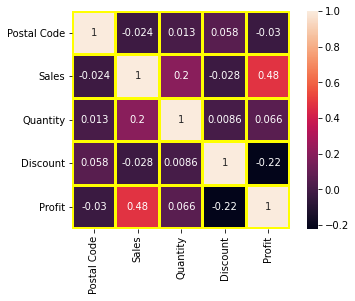

In [22]:
#heatmap
import seaborn as sb
sb.heatmap(raw_data.corr(), annot=True,linecolor='yellow',linewidths=2,square=True)

In [23]:
#find the unique no of 'sub category' values
raw_data['Sub-Category'].unique()
raw_data['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

# **Data Visualization**

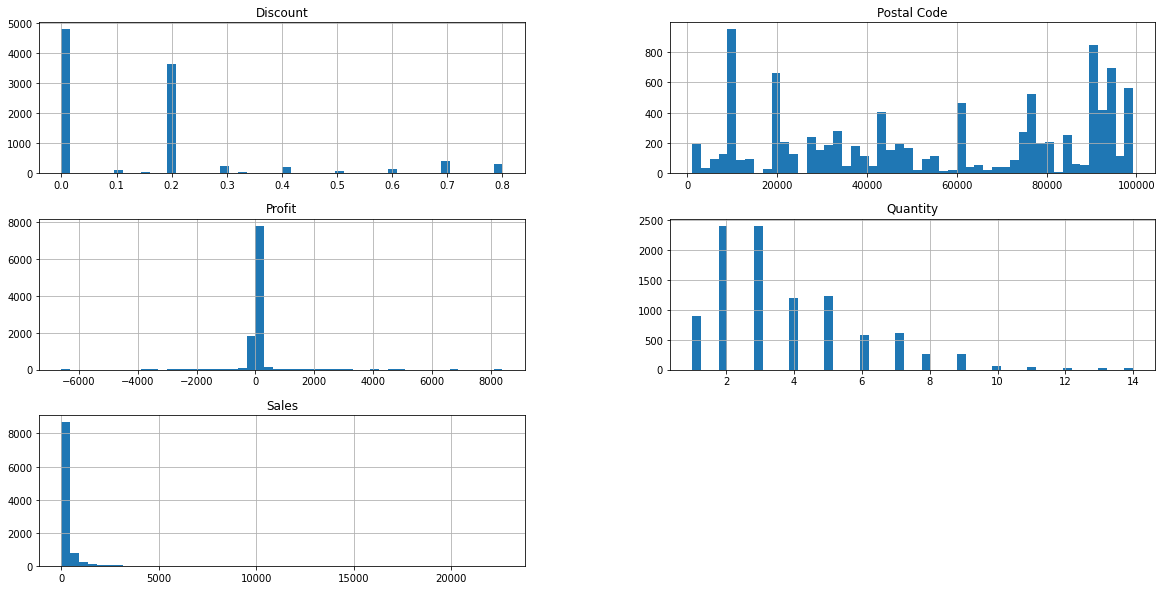

In [25]:
import matplotlib.pyplot as plot
raw_data.hist(bins=50 ,figsize=(20,10))
plot.show();

In [27]:
#Except postal code graph, graphs look normal
#Lets remove the postal code graph
col=['Postal Code']
data_1=raw_data.drop(columns=col,axis=1)
data_1.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


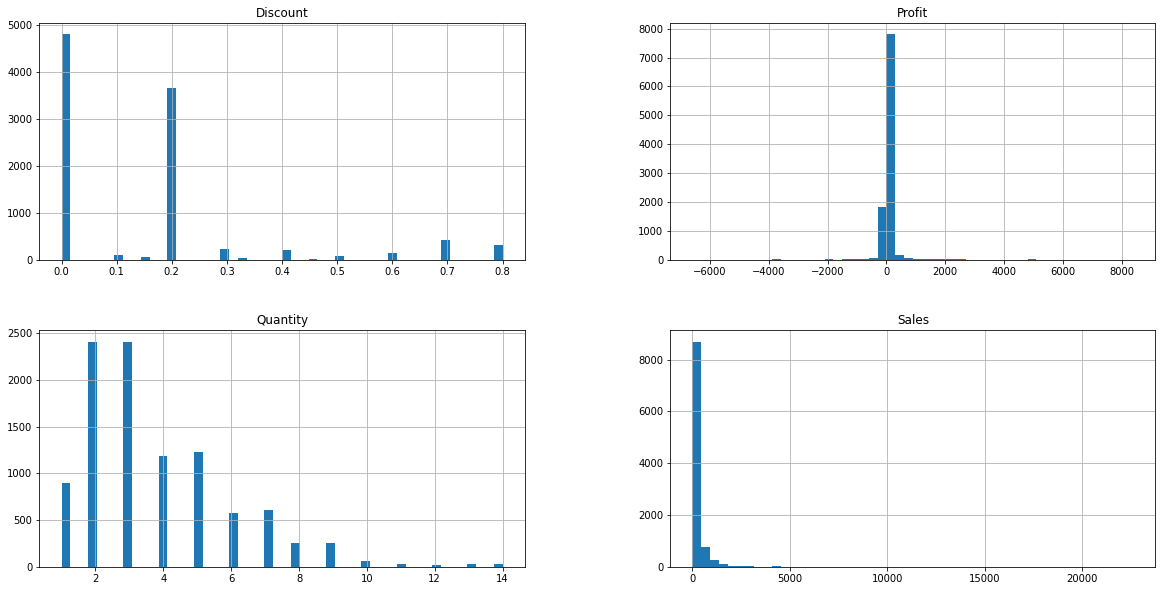

In [28]:
data_1.hist(bins=50 ,figsize=(20,10))
plot.show();

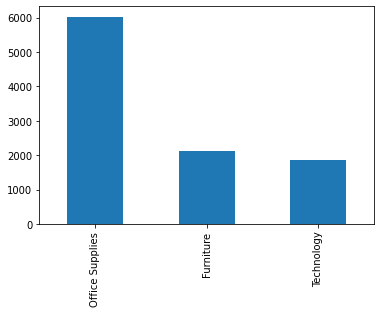

In [36]:
#lets target category column with sales column to know more through graphs
data_1['Category'].value_counts().plot(kind='bar')
plot.show()

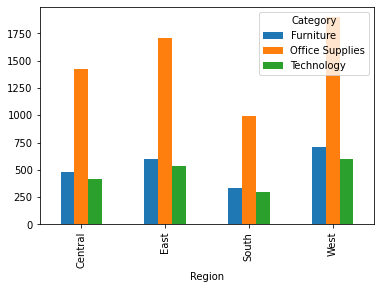

In [37]:
#plotting bar chart for region vs category to know about demand of categories
pd.crosstab(data_1['Region'],data_1['Category']).plot(kind = 'bar')

the above plot shows max sale in west region and min sale in south region with office supplies category being the most in demand and technology in least.

# **CALCULATE PROFIT/LOSS IN SALE**

In [38]:
#Adding Profit and Profit Percentage coulumn
data_1['profit%'] = data_1['Profit'] / data_1['Sales'] * 100
data_1.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,profit%
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,16.00
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820,30.00
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,47.00
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,-40.00
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,11.25


to know the maximum profit and loss, 

In [39]:
print("MAX PROFIT")
max(data_1['profit%'])

MAX PROFIT


50.0

In [40]:
print("MIN PROFIT")
min(data_1['profit%'])

MIN PROFIT


-275.0

now to understand how much percentage of data was under loss

In [42]:
L1=data_1[data_1['profit%'] < 0].shape
L1

(1871, 13)

In [43]:
total=data_1.shape
total

(9994, 13)

In [44]:
L1_per=1871/9994*100
L1_per

18.721232739643785

around 18% of total data is under zero i.e. in loss

## **CALCULATE PROFIT/LOSS IN CITY**

In [45]:
#Adding Profit and Profit Percentage coulumn
profit_city = data_1.groupby("City").sum()['Profit']
profit_city

City
Aberdeen          6.6300
Abilene          -3.7584
Akron          -186.6356
Albuquerque     634.0881
Alexandria      318.6183
                 ...    
Woonsocket       78.6791
Yonkers        2767.7557
York           -102.1692
Yucaipa          13.2080
Yuma           -465.9909
Name: Profit, Length: 531, dtype: float64

In [46]:
#we need to sort to get the max and min profit values
profit_city.sort_values(ascending = False).head()

City
New York City    62036.9837
Los Angeles      30440.7579
Seattle          29156.0967
San Francisco    17507.3854
Detroit          13181.7908
Name: Profit, dtype: float64

In [47]:
profit_city.sort_values(ascending = True).head()

City
Philadelphia   -13837.7674
Houston        -10153.5485
San Antonio     -7299.0502
Lancaster       -7239.0684
Chicago         -6654.5688
Name: Profit, dtype: float64

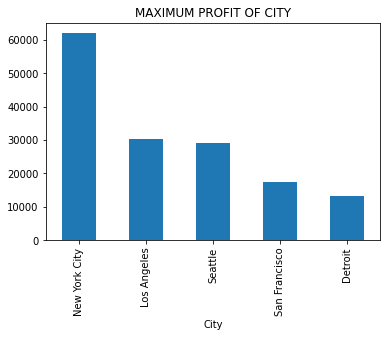

In [48]:
profit_city.sort_values(ascending = False).head().plot(kind ='bar')
plot.title("MAXIMUM PROFIT OF CITY")
plot.show()

new york city has max profit

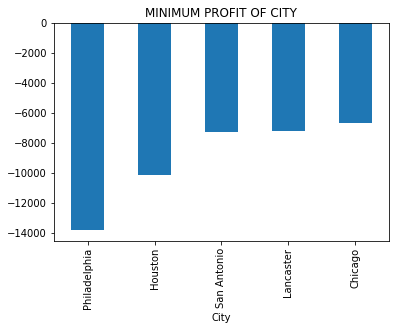

In [49]:
profit_city.sort_values(ascending = True).head().plot(kind ='bar')
plot.title("MINIMUM PROFIT OF CITY")
plot.show()

chicago has the lowest profit

# **Variance as per city, state, region**

In [50]:
data_1.groupby("City").Profit.agg(["sum","mean","min","max","count","median","std","var"])

,sum,mean,min,max,count,median,std,var
City,,,,,,,,
Aberdeen,6.6300,6.630000,6.6300,6.6300,1,6.63000,NaN,NaN
Abilene,-3.7584,-3.758400,-3.7584,-3.7584,1,-3.75840,NaN,NaN
Akron,-186.6356,-8.887410,-80.9955,66.5408,21,0.61920,37.225537,1385.740617
Albuquerque,634.0881,45.292007,-5.6943,138.3552,14,27.68800,44.986753,2023.807910
Alexandria,318.6183,19.913644,0.0000,83.2810,16,8.37355,25.611603,655.954233
...,...,...,...,...,...,...,...,...
Woonsocket,78.6791,19.669775,13.8915,22.8900,4,20.94880,4.016137,16.129358
Yonkers,2767.7557,184.517047,-264.9208,2400.9657,15,16.75080,620.704272,385273.793188
York,-102.1692,-20.433840,-50.8704,23.7742,5,-27.93120,27.462464,754.186920


In [51]:
data_1.groupby("State").Profit.agg(["mean","min","max","count","std","var"])

,mean,min,max,count,std,var
State,,,,,,
Alabama,94.865989,0.0000,1459.2000,61,210.901876,44479.601429
Arizona,-15.303235,-814.4832,211.4955,224,109.266267,11939.117124
Arkansas,66.811452,1.4190,843.1706,60,123.249880,15190.532873
California,38.171608,-325.5720,1906.4850,2001,97.691593,9543.647400
Colorado,-35.867351,-3399.9800,247.9960,182,276.424024,76410.240842
Connecticut,42.823071,-15.5826,294.6710,82,66.138081,4374.245726
Delaware,103.930988,-48.7839,5039.9856,96,518.953513,269312.749126
District of Columbia,105.958930,4.4344,648.5624,10,213.461353,45565.749398
Florida,-8.875461,-1811.0784,327.5922,383,126.324165,15957.794770


In [52]:
data_1.groupby("Region").Profit.agg(["mean","min","max","count","std","var"])

,mean,min,max,count,std,var
Region,,,,,,
Central,17.092709,-3701.8928,8399.9760,2323,291.487465,84964.942066
East,32.135808,-6599.9780,5039.9856,2848,251.605084,63305.118416
South,28.857673,-3839.9904,3177.4750,1620,212.893088,45323.466948
West,33.849032,-3399.9800,6719.9808,3203,174.109081,30313.971920


From the above table, we can figure out profit from which city, state and region is max and min along with mean, standard deviation and variance as per profit. 

# Count Plot

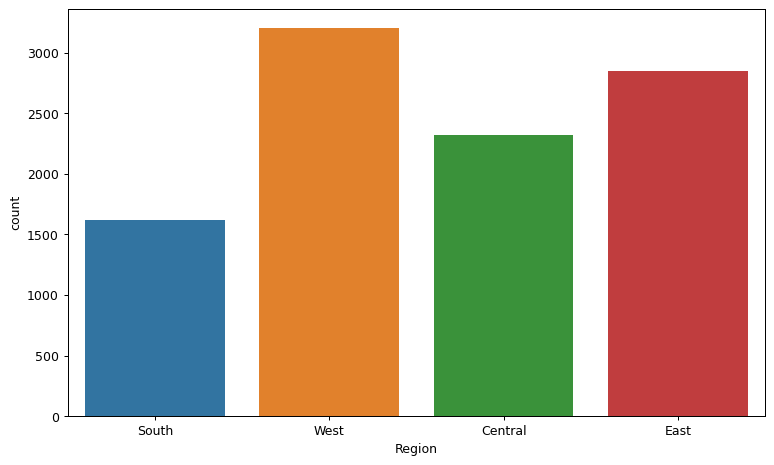

In [53]:
plot.figure(figsize=(10,6),dpi=90)
sb.countplot(x="Region",data=data_1)
plot.show()

west region as maximum sales , then east and south with the least sale among all regions.

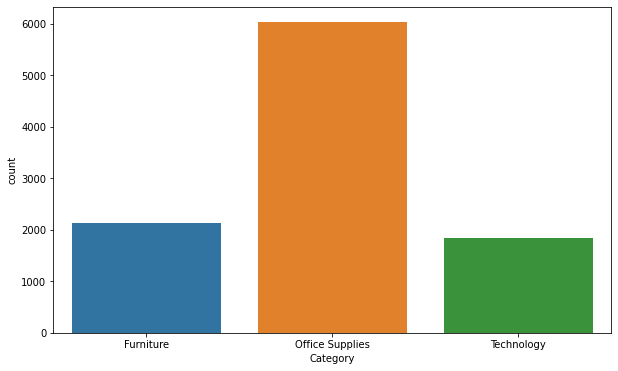

In [54]:
plot.figure(figsize=(10,6))
sb.countplot(x="Category",data=data_1)
plot.show()

office supplies have maximum sale.

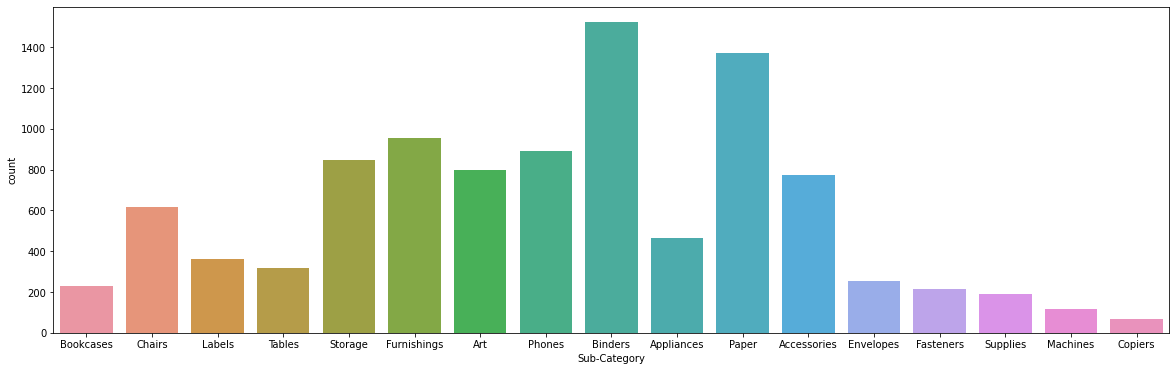

In [56]:
plot.figure(figsize=(20,6))
sb.countplot(x="Sub-Category",data=data_1)
plot.show()

Binders have maximum sale while copiers have the least sales.

#Pie Chart

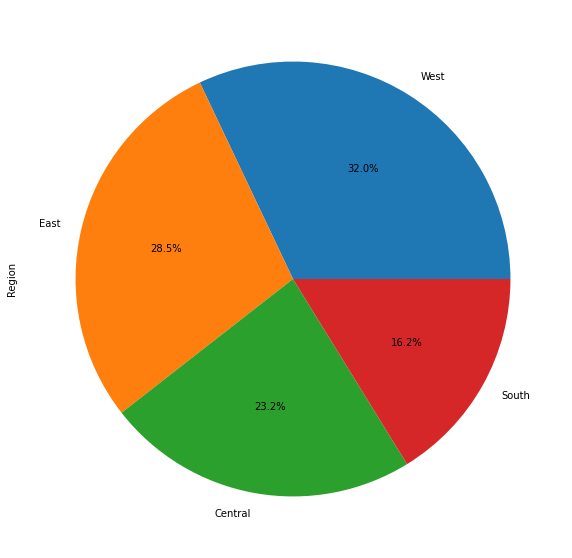

In [99]:
plot.figure(figsize=(30,10))
data_1['Region'].value_counts().plot.pie(autopct="%1.1f%%")
plot.show()

West region has maximum no of sales while South has the minimum sale.

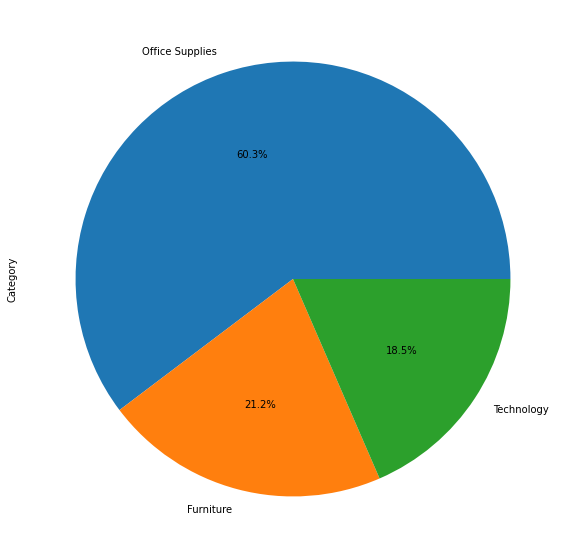

In [101]:
plot.figure(figsize=(30,10))
data_1['Category'].value_counts().plot.pie(autopct="%1.1f%%")
plot.show()

Office Supplies has max sale followed by Furniture and Technology